In [1]:
# load required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load required functionality from keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adadelta
from keras.utils import np_utils
from keras import backend as keras_backend


Using TensorFlow backend.


## MNIST Dataset
The MNIST data set is a large database of handwritten digits (0-9) that is commonly used for training and benchmarking binary classification models.

Before we create any models, we'll start by loading the MNIST data and viewing some sample images.

In [2]:
from keras.datasets import mnist

# split MNIST data into training and testing sets
# - training: data used to learn the model parameters
# - testing: a separate set that we will use to validate our model performance
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# check the dimensions of the data
print( X_train.shape )

(60000, 28, 28)


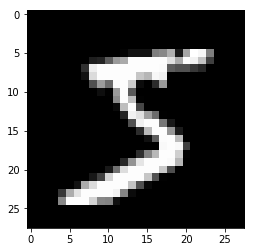

In [4]:
# select an image
img = X_train[0]

# show the image
plt.imshow(img, cmap='gray')
plt.show()

Notice anything about the images? For example, how many pixels are in each image?

Now that we can view the images, let's try also showing the true label alongside the image:

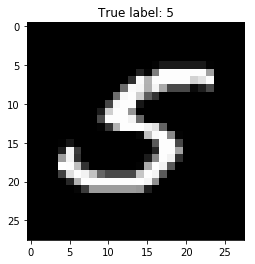

In [5]:
# select one of the images and its corresponding label
i = 403
img = X_train[i]
label = y_train[i]

# show the image and its label
plt.imshow(img, cmap='gray')
plt.title("True label: %d" % label)
plt.show()

**Logistic regression implemented in Keras**


Before moving onto models, we should pre-process the MNIST data:
1. reshape the MNIST images into 1D arrays (from 2D arrays)
2. normalize the MNIST images
3. convert the MNIST labels

In [0]:

# reshape the data: (n_samples, 28, 28) => (n_samples, 28*28)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# convert data type and normalize the values (8-bit = 256 = 0...255)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# convert the class labels to 10-dimensional class arrays:
# - before: y_train = (n_samples, )
# - after: Y_train = (n_samples, 10)
#
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:

print(y_train[0], Y_train[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# create the model
model = Sequential()
model.add(Dense(10, input_dim=28*28, activation='softmax'))

# compile the model
#model.compile(loss='categorical_crossentropy',
#              optimizer='sgd',
#              metrics=['accuracy'])            
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])            


# train the model on data
model.fit(X_train, Y_train,
          batch_size=128, # how many images to look at together
          nb_epoch=20,       # how many epochs to run before stopping
          verbose=1,
          validation_data=(X_test, Y_test)
         )

# test the trained model on the testing set
score = model.evaluate(X_test, Y_test, verbose=0) 

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  128/60000 [..............................] - ETA: 39s - loss: 0.0910 - acc: 0.1328

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


60000/60000 [==============================] - 1s 19us/step - loss: 0.0898 - acc: 0.1714 - val_loss: 0.0885 - val_acc: 0.2103
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0874 - acc: 0.2415 - val_loss: 0.0860 - val_acc: 0.2683
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0849 - acc: 0.2990 - val_loss: 0.0835 - val_acc: 0.3266
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0823 - acc: 0.3629 - val_loss: 0.0808 - val_acc: 0.3973
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0797 - acc: 0.4297 - val_loss: 0.0780 - val_acc: 0.4613
Epoch 6/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0769 - acc: 0.4848 - val_loss: 0.0751 - val_acc: 0.5135
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0740 - acc: 0.5246 - val_loss: 0.0721 - val_acc: 0.5511
Epoch 8/20
60000/60000 [============================

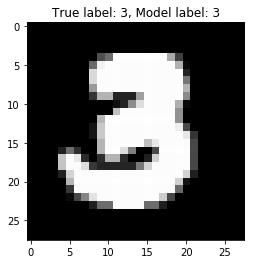

In [0]:
# select an image
i = 200
img = X_test[i].reshape(28, 28)

# prepare the image to be used in the model
x = img.reshape(-1, 28*28)

# get the model output
model_label = np.argmax( model.predict(x) )

# get the true label
true_label = np.argmax(Y_test[i])

plt.imshow(img, cmap='gray')
plt.title('True label: {0}, Model label: {1}'.format(true_label, model_label))
plt.show()

**Multilayer Perceptron (MLP)**

Next we'll try out a "classic" neural network model (i.e. not a deep neural network).

A Multilayer Perceptron (aka an Artificial Neural Network) is made up of an input layer, one or more hidden layers, and an output layer

In [0]:
# create the MLP model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# print a summary of the model topology
#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=128,
          epochs=2,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

**Discussion**
**Question 1:** How did the accuracy of the MLP model compare to the Logistic Regression model?

**Question 2:** Can you identify any other differences between the MLP and Logistic Regression models? *Hint:* Was there a difference in the code complexity and/or training time?

**Convolutional Neural Network (CNN)**
Now let's try out first deep neural network: a Convolutional Neural Network (CNN).

The CNN is made up of a few core layer types, which get stacked on top of each other:
- convolutional layers (2D)
- max pooling layers (2D)
- fully connected (aka densely connected) layers (same type as in the MLP model)


First, we need to perform pre-processing on the MNIST data, but with a slight tweak from the previous examples:

In [0]:
# load the data again (to be safe)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape the data based on what backend is in use (TensorFlow or Thean)
if keras_backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(-1, 1, 28, 28)
    X_test = X_test.reshape(-1, 1, 28, 28)
else:
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

# convert data type and normalize the values (8-bit = 256 = 0...255)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# convert the class labels to 10-dimensional class arrays:
# - before: y_train = (n_samples, )
# - after: Y_train = (n_samples, 10)
#
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# create the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)
                ))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=128,
          epochs=2,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

**Discussion**
**Question 1:** How did the accuracy of the CNN compare to the MLP and Logistic Regression models?

**Question 2:** Can you identify any other differences between the three models?